In [1]:
import os
import cv2
import os
import numpy as np
import torch
import sys
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__vsc_ipynb_file__), '../../')))
import torch
from gestures.configs import new_config as cfg1
# from gestures.data_loader1.load import get_data_loader

# from gestures.data_loader.tiny_data_loader import get_tiny_data_loader
from gestures.network.experiment_tracker import get_time_in_string
from gestures.network.runner import Runner
from gestures.setup import setup_callbacks, setup_model




In [8]:
def get_preds_for_best_models(model, loader,device, task: str):
    preds_list, trues_list = [], []
    print(len(loader))
    c = 0
    for batch, labels in loader:
        if c % 10 == 0:
            print(c)
        c += 1
        batch, labels = model.reshape_to_model_output(
            batch, labels, device
        )

        outputs = model(batch)
        preds = outputs[1] if task == "sr_classifier" else outputs
        class_labels = labels[1] if task == "sr_classifier" else labels

        pred_labels = preds.cpu().detach().numpy().reshape(-1, 12)

        pred_labels = np.argmax(pred_labels, axis=1)
        preds_list.append(pred_labels)
        trues_list.append(class_labels.cpu().detach().numpy().reshape(-1))
        # trues.append(labels.cpu().detach().numpy().reshape(-1))

    return preds_list, trues_list

In [4]:

model_path = "/Users/netanelblumenfeld/Desktop/bgu/Msc/code/outputs1/sr_classifier/sr_SAFMN_classifier_TinyRadar_sr_loss_L1_classifier_loss_TinyLoss/ds_2_original_dim_False_not_norm_doppler/2024-05-14_12:44:25/model/total_loss.pth"
data_config = cfg1.data_config
main_config = cfg1.main_config
data_dir, output_dir, device = (
    main_config["data_dir"],
    main_config["output_dir"],
    main_config["device"],
)
dummy_tensor = torch.randn(10, 10, device=device)

# loop for different ds factors
extra_info = "not_norm_doppler"

data_loaders = get_data_loader(
    data_dir=main_config["data_dir"],
    task=main_config["task"],
    loader_cfg=cfg1.data_loader,
    processing_func=cfg1.pr_funcs,
    ds_factor=2,
)
# getting model
model_cls, optimizer, acc, loss_metric = setup_model(
    task=main_config["task"],
    model_cfg=cfg1.model_config,
    device=device,
)
model, _, _, _ = model_cls.load_model(device, model_path)


In [9]:
a,b = get_preds_for_best_models(model, data_loaders["test"], device, main_config["task"])

157
0


RuntimeError: Given input size: (32x2x24). Calculated output size: (32x0x4). Output size is too small

In [2]:
from gestures.data_loader2.dataset_factory import *
from gestures.utils_processing_data import *
files = os.listdir("/Users/netanelblumenfeld/Downloads/11G/test")
gestures = [
    "PinchIndex",
    "PinchPinky",
    "FingerSlider",
    "FingerRub",
    "SlowSwipeRL",
    "FastSwipeRL",
    "Push",
    "Pull",
    "PalmTilt",
    "Circle",
    "PalmHold",
    "NoHand",
    "RandomGesture",
]
base_dir = "/Users/netanelblumenfeld/Downloads/11G/test"
data_loader = get_data_loader(files, 4, gestures, base_dir)


In [3]:
for i, (data, label) in enumerate(data_loader):
    break
imgs = label[0]

In [4]:
label[0].shape

torch.Size([4, 2, 5, 2, 32, 492])

In [5]:
imgs = RealToComplexBatch()(imgs)
imgs = DopplerMapBatch()(imgs)

In [6]:
imgs.shape

torch.Size([4, 5, 2, 32, 492])

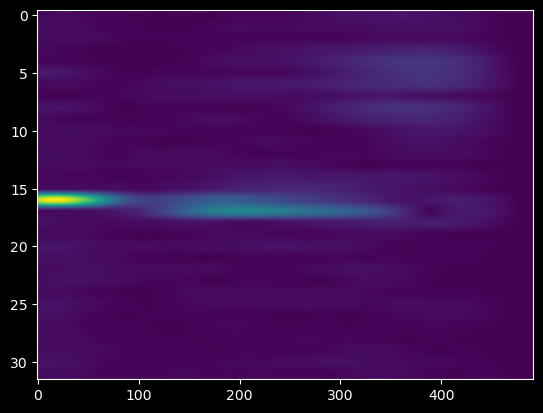

In [12]:
plt.imshow(imgs[3, 1,0], aspect='auto')

In [1]:
def findCrossoverIndexHelper(x, y, left, right):
    mid = (right + left) // 2

    if left >= right:
        return -1

    # Check if mid is the crossover index
    if y[mid] <= x[mid] and y[mid + 1] > x[mid + 1]:
        print(mid)
        return mid
    elif y[mid] < x[mid]:
        findCrossoverIndexHelper(x, y, left, mid - 1)
    else:
        findCrossoverIndexHelper(x, y, mid + 1, right)


x1 = [2, 7, 10, 12, 13]
y1 = [0, 8, 9, 11, 17]

# Find the crossover index
crossover_index = findCrossoverIndexHelper(x1, y1, 0, len(x1) - 1)
print(crossover_index)  # Expected output: 1

0
None
